In [86]:
# EDA를 위한 분석 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#검증 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split
#학습을 위한 모델 클래스
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#평가를 위한 함수(정확도)
from sklearn.metrics import accuracy_score

In [87]:
train_data = pd.read_csv("./data/salary/train.csv", index_col="no")
test = pd.read_csv("./data/salary/test.csv" , index_col="no")
display("Train")
display(train_data.head())
display("Test")
display(test.head())

'Train'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


'Test'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
29306,18,?,245274,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States
29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States


In [88]:
# 전체 데이터 수 파악
train_data.shape, test.shape

((29305, 15), (19537, 14))

In [89]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


In [90]:
# 범주형 데이터
# workclass, education, marital-status, occupation, relationship, race, sex, native-country
# 수치형 데이터
# age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

In [91]:
display(train_data.corr()) # 상관계수 확인

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.075753,0.035084,0.078498,0.054413,0.073100,0.238460
fnlwgt,-0.075753,1.000000,-0.030600,-0.005051,-0.001513,-0.010154,-0.002994
education-num,0.035084,-0.030600,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.078498,-0.005051,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.054413,-0.001513,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.073100,-0.010154,0.147569,0.088609,0.055271,1.000000,0.231045
income,0.238460,-0.002994,0.331798,0.221387,0.135645,0.231045,1.000000


In [92]:
# 결측치 확인(결측치 null이 아닌 " ?"로 처리되어있음) 
# 숫자형에는 결측치 없음
# workclass(1663), occupation(1668), native-country(495) 결측치 있음
# workclass - private 수가 너무 많아서 의미 없을거 같음(결측치private로 처리)
# occupation - 결측치 처리 하지 않고 ? 그대로 사용할것임 -> 3~4단계로 분류
# native-country - United-States수가 너무 많아서 의미 없을거 같음(결측치United-States로 처리)
train_data[train_data['native-country']==" ?"].count()


age               495
workclass         495
fnlwgt            495
education         495
education-num     495
marital-status    495
occupation        495
relationship      495
race              495
sex               495
capital-gain      495
capital-loss      495
hours-per-week    495
native-country    495
income            495
dtype: int64

In [93]:
!pip install sklearn-pandas

In [94]:
# from sklearn_pandas import CategoricalImputer
# imputer = CategoricalImputer()
# # 결측치처리
# train_data['workclass'] = imputer.fit_transform(train_data['workclass'])
# train_data['occupation'] = imputer.fit_transform(train_data['occupation'])
# train_data['native_country'] = imputer.fit_transform(train_data['native_country'])
# #확인
# train_data.isna().sum()

In [95]:
# train_data['native-country']=train_data['native-country'].str.replace("?","United-States")
# train_data['workclass']=train_data['workclass'].str.replace("?","private")
# test['native-country']=test['native-country'].str.replace("?","United-States")
# test['workclass']=test['workclass'].str.replace("?","private")

In [96]:
# train_data['occupation']=train_data['occupation'].str.replace("?","Prof-specialty")
# test['occupation']=test['occupation'].str.replace("?","Prof-specialty")

In [97]:
# checking '?' in our dataset
train_data.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [98]:
# We are replacing '?' with np.nan
train_data = train_data.replace(to_replace='?', value=np.nan)

# Now again checking missing values
print("\n ----Missing values---\n")
print(train_data.isna().sum())

# Missing values in percentage
print("\n ----Missing values in percentage---\n")
print(round((train_data.isna().sum()/train_data.shape[0])*100,2))
print("\n---Total {}% of missing values present in our dataset".
      format(round(sum(train_data.isna().sum()/train_data.shape[0])*100,2)))


 ----Missing values---

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

 ----Missing values in percentage---

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

---Total 0.0% of missing values present in our dataset


In [99]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

ImportError: cannot import name 'CategoricalImputer' from 'sklearn_pandas' (C:\Users\pipi1\anaconda3\lib\site-packages\sklearn_pandas\__init__.py)

In [100]:

# Imputing the missing values
train_data['workclass'] = imputer.fit_transform(train_data['workclass'])
train_data['occupation'] = imputer.fit_transform(train_data['occupation'])
train_data['native_country'] = imputer.fit_transform(train_data['native_country'])

NameError: name 'imputer' is not defined

In [101]:
# Again checking missing values after imputation
train_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [102]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [ ]:
# test['workclass'] = imputer.fit_transform(test['workclass'])
# test['occupation'] = imputer.fit_transform(test['occupation'])
# test['native_country'] = imputer.fit_transform(test['native_country'])

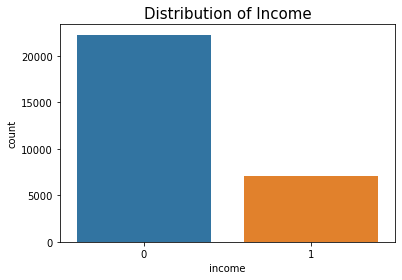

In [103]:
# Checking label counts
sns.countplot(x='income', data=train_data)
plt.title("Distribution of Income", fontsize = 15)
plt.show()

In [104]:
print('-> Total No. of records : {}\n'.format(len(train_data)))

print('-> Number of people making more that >50K : {}%\n'.format(
    round((len(train_data[train_data['income']==1])/32561)*100, 2)))

print('-> Number of people making less than or equal to <=50K : {}%'.format(
    round((len(train_data[train_data['income']==0])/32561)*100, 2)))

-> Total No. of records : 29305

-> Number of people making more that >50K : 21.64%

-> Number of people making less than or equal to <=50K : 68.36%


C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

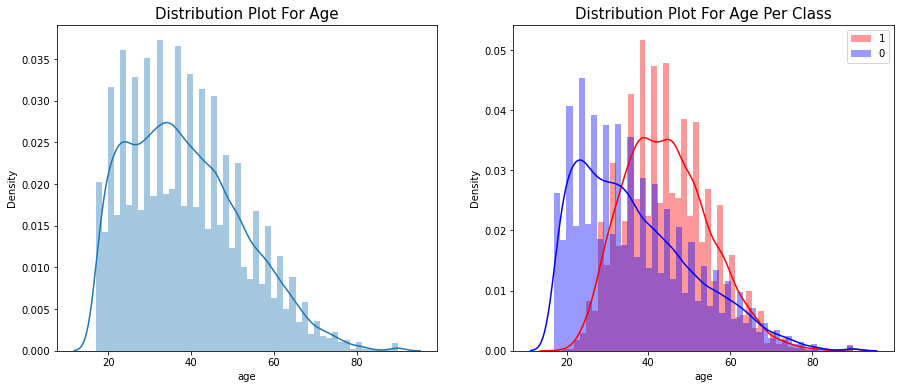

In [105]:
# Distribution plot for age column
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.distplot(train_data['age'])
plt.title('Distribution Plot For Age', fontsize = 15)

# Distribution plot for age per class
plt.subplot(1,2,2)
sns.distplot(train_data[train_data['income']==1]['age'], label='1', color='red')
sns.distplot(train_data[train_data['income']==0]['age'], label='0', color='blue')
plt.legend()
plt.title('Distribution Plot For Age Per Class', fontsize = 15)
plt.show()

C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


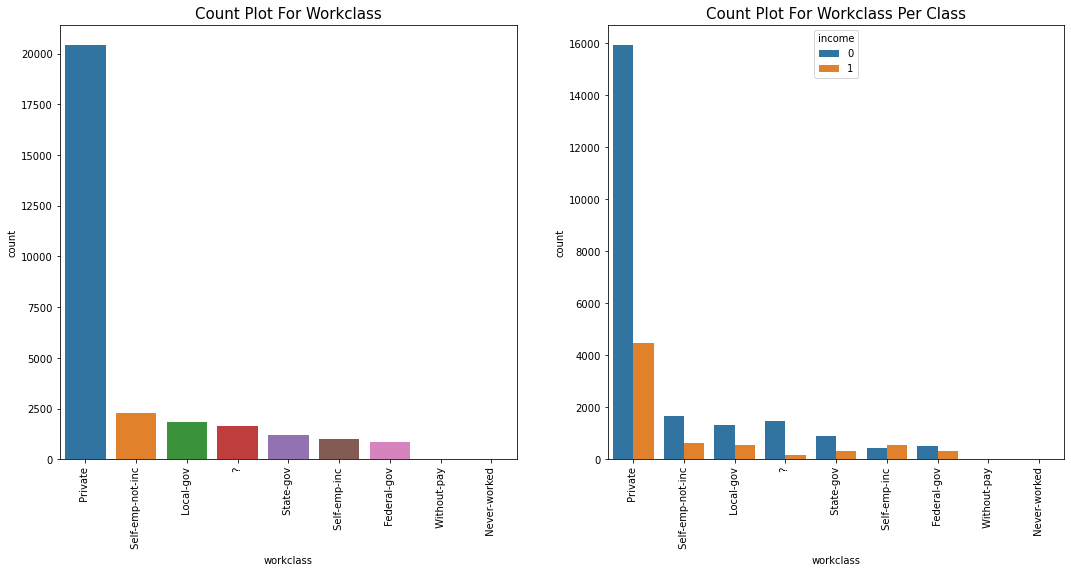

In [106]:
# Countplot for workclass column
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(train_data['workclass'])
plt.title("Count Plot For Workclass", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for workclass per class
plt.subplot(1,2,2)
sns.countplot(data=train_data, x='workclass', hue='income')
plt.title("Count Plot For Workclass Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

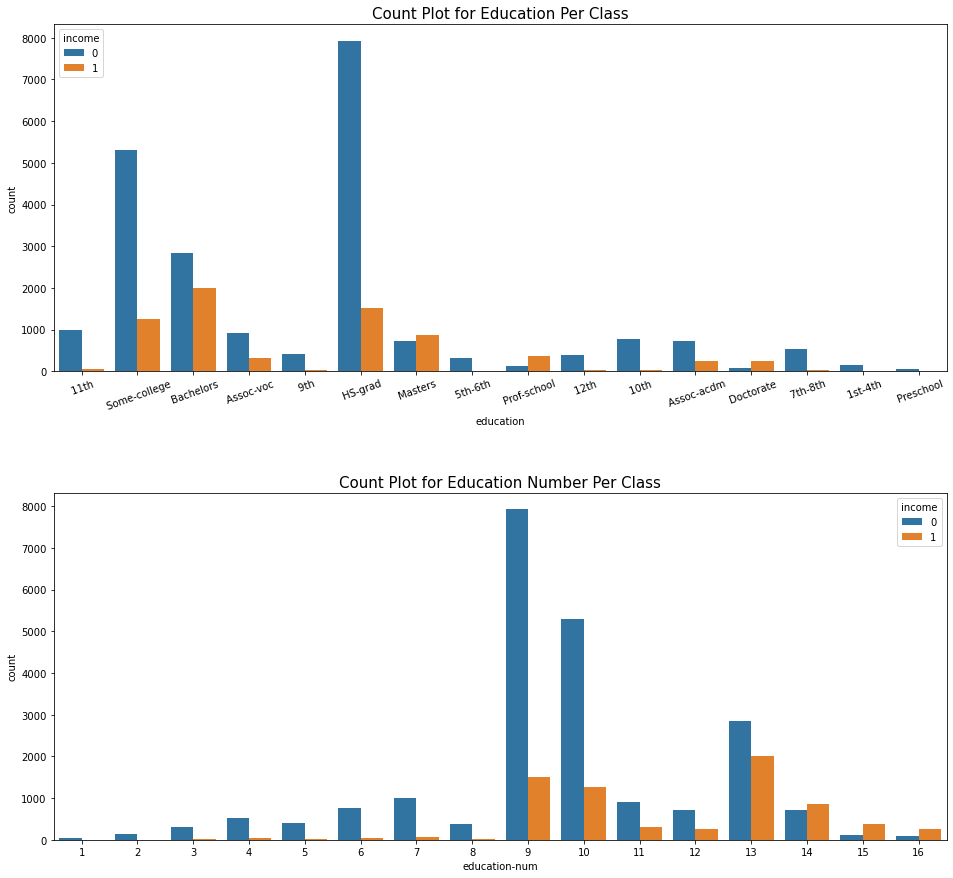

In [107]:
# Count Plot for Education Per Class
plt.figure(figsize=[16,15])
plt.subplot(2,1,1)
sns.countplot(x='education', data=train_data, hue='income')
plt.xticks(rotation=20)
plt.title("Count Plot for Education Per Class", fontsize = 15)

# Count Plot for Education Number Per Class
plt.subplot(2,1,2)
sns.countplot(x='education-num', data=train_data, hue='income')
plt.title("Count Plot for Education Number Per Class", fontsize = 15)
plt.subplots_adjust(hspace = 0.35)

In [108]:
education_classes = train_data['education'].unique()
for educ_class in education_classes:
    print("{}, the Education Number is {}".
          format(educ_class, train_data[train_data['education'] == educ_class]['education-num'].unique()))


 11th, the Education Number is [7]
 Some-college, the Education Number is [10]
 Bachelors, the Education Number is [13]
 Assoc-voc, the Education Number is [11]
 9th, the Education Number is [5]
 HS-grad, the Education Number is [9]
 Masters, the Education Number is [14]
 5th-6th, the Education Number is [3]
 Prof-school, the Education Number is [15]
 12th, the Education Number is [8]
 10th, the Education Number is [6]
 Assoc-acdm, the Education Number is [12]
 Doctorate, the Education Number is [16]
 7th-8th, the Education Number is [4]
 1st-4th, the Education Number is [2]
 Preschool, the Education Number is [1]


In [109]:
# education & education number column are just the same, so I am dropping education number column.
train_data.drop(labels='education-num', axis=1, inplace=True)


Text(0.5, 1.0, 'Countplot for Gender Per Class')

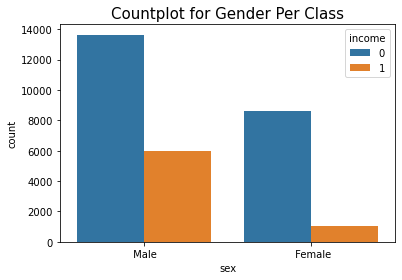

In [110]:
# Count Plot For Gender Per Class
sns.countplot(x='sex' ,data=train_data, hue='income')
plt.title("Countplot for Gender Per Class", fontsize = 15)

C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


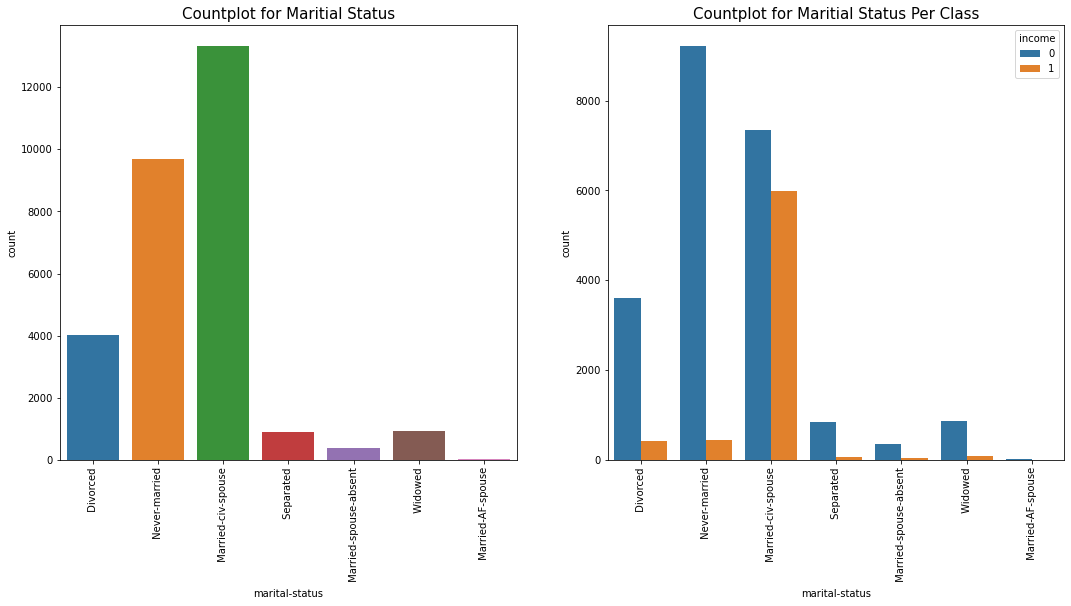


 --Value Counts-- 

 Married-civ-spouse       13331
 Never-married             9673
 Divorced                  4030
 Widowed                    942
 Separated                  914
 Married-spouse-absent      394
 Married-AF-spouse           21
Name: marital-status, dtype: int64


In [111]:
# Countplot for Maritial Status
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(train_data['marital-status'])
plt.title("Countplot for Maritial Status", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for Maritial Status Per Class
plt.subplot(1,2,2)
sns.countplot(train_data['marital-status'],hue=train_data['income'])
plt.title("Countplot for Maritial Status Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(train_data['marital-status'].value_counts())

In [112]:
# Transforming Maritial Status column with value as either married or not married.
train_data = train_data.replace({'Married-civ-spouse':'married','Married-AF-spouse':'married','Married-spouse-absent':'married',
                    'Never-married':'not married','Divorced':'not married','Separated':'not married','Widowed':'not married'})


C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


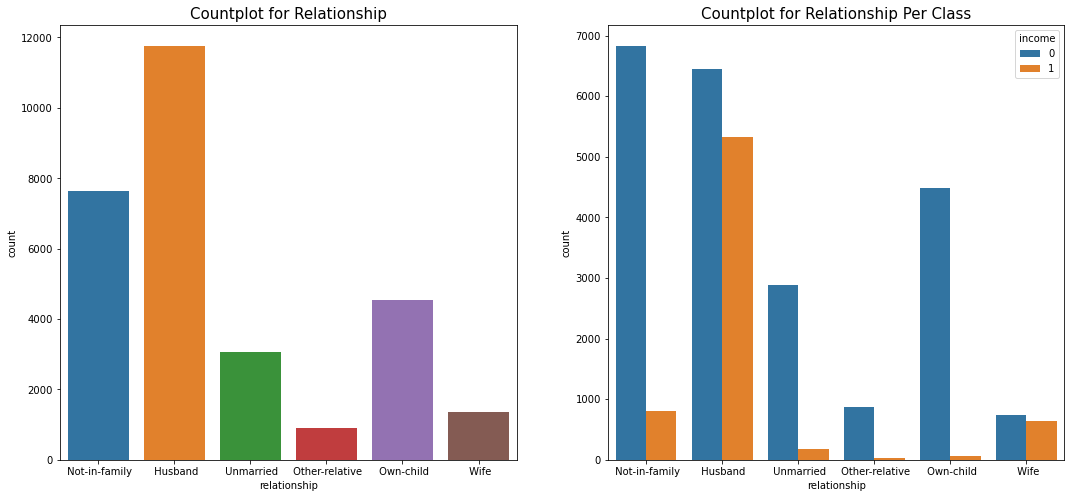


 --Value Counts-- 

 Husband           11769
 Not-in-family      7637
 Own-child          4554
 Unmarried          3071
 Wife               1370
 Other-relative      904
Name: relationship, dtype: int64


In [113]:
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(train_data['relationship'])
plt.title('Countplot for Relationship', fontsize = 15)


plt.subplot(1,2,2)
sns.countplot(train_data['relationship'],hue=train_data['income'])
plt.title('Countplot for Relationship Per Class', fontsize = 15)
plt.show()

print('\n --Value Counts-- \n')
print(train_data['relationship'].value_counts())

C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countplot for Race Per Class')

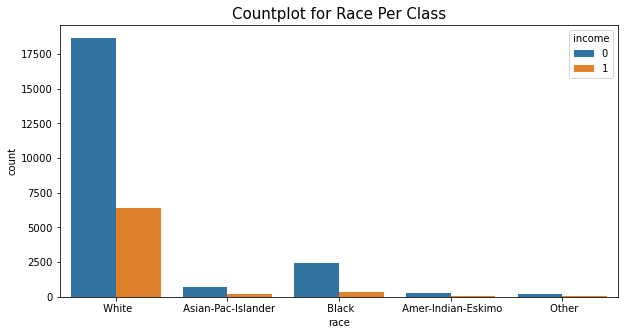

In [114]:

plt.figure(figsize=[10,5])
sns.countplot(train_data['race'], hue=train_data['income'])
plt.title('Countplot for Race Per Class', fontsize = 15)

C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


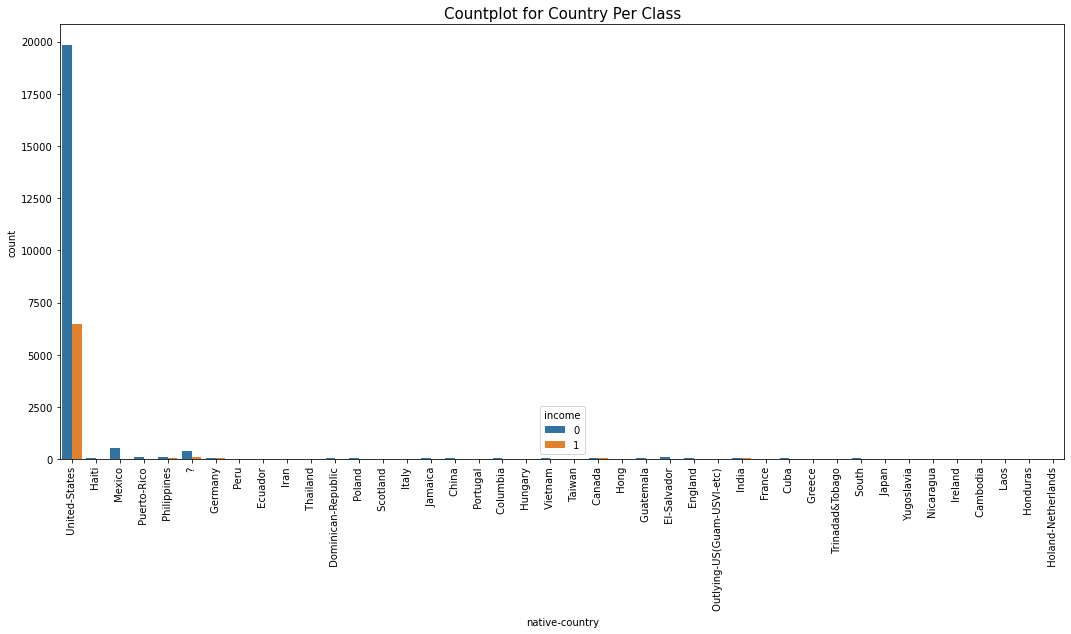


 --Value Counts-- 

 United-States                 26301
 Mexico                          579
 ?                               495
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Poland                           53
 Columbia                         53
 Guatemala                        51
 Haiti                            51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Peru            

In [115]:
plt.figure(figsize=[18,8])
sns.countplot(train_data['native-country'],hue=train_data['income'])
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(train_data['native-country'].value_counts())

print('\n-----------------------------------')
print('{}% people belong from united states.'
      .format(round(len(train_data[train_data['native-country']=='United-States'])/32561*100,2)))

print('{}% people belong from other country.'
      .format(round(len(train_data[train_data['native-country']!='United-States'])/32561*100,2)))


C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


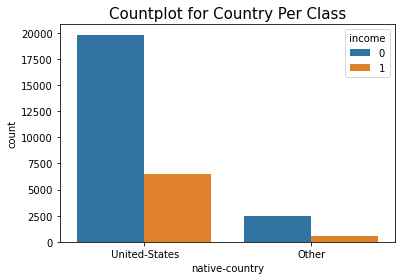

In [116]:
# Transforming native country column with value as either United States or Other.
countries = train_data['native-country'].unique()[1:]
train_data['native-country'] = train_data['native-country'].replace(to_replace=countries, value='Other')
# Countplot for Country Per Class
sns.countplot(train_data['native-country'], hue=train_data['income'])
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.show()

C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


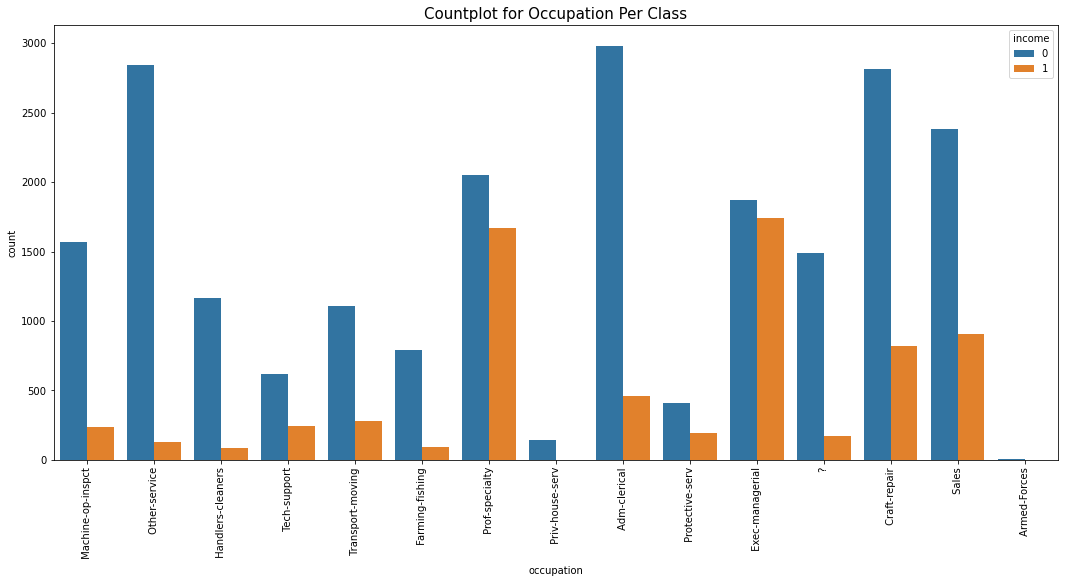

In [117]:
plt.figure(figsize=[18,8])
sns.countplot(train_data['occupation'], hue=train_data['income'])
plt.title('Countplot for Occupation Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot for hours per week')

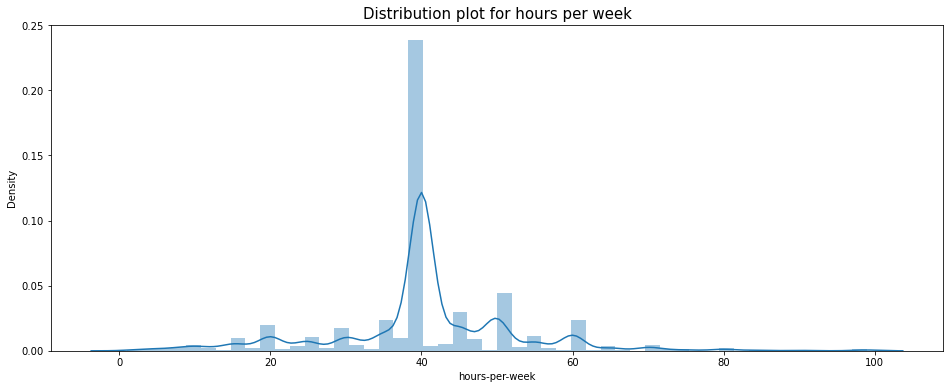

In [118]:
# Distribution plot for hours per week column
plt.figure(figsize=[16,6])
sns.distplot(train_data['hours-per-week'])
plt.title('Distribution plot for hours per week', fontsize = 15)

In [119]:
# Categorical features
cat_df = train_data.select_dtypes(include=['object'])
num_df = train_data.select_dtypes(include=['int64'])

# Categorical column with their unique value
for i in cat_df.columns:
    print("{} : {} \n".format(i, cat_df[i].unique()))

workclass : [' Private' ' Self-emp-not-inc' ' Local-gov' ' ?' ' State-gov'
 ' Self-emp-inc' ' Federal-gov' ' Without-pay' ' Never-worked'] 

education : [' 11th' ' Some-college' ' Bachelors' ' Assoc-voc' ' 9th' ' HS-grad'
 ' Masters' ' 5th-6th' ' Prof-school' ' 12th' ' 10th' ' Assoc-acdm'
 ' Doctorate' ' 7th-8th' ' 1st-4th' ' Preschool'] 

marital-status : [' Divorced' ' Never-married' ' Married-civ-spouse' ' Separated'
 ' Married-spouse-absent' ' Widowed' ' Married-AF-spouse'] 

occupation : [' Machine-op-inspct' ' Other-service' ' Handlers-cleaners'
 ' Tech-support' ' Transport-moving' ' Farming-fishing' ' Prof-specialty'
 ' Priv-house-serv' ' Adm-clerical' ' Protective-serv' ' Exec-managerial'
 ' ?' ' Craft-repair' ' Sales' ' Armed-Forces'] 

relationship : [' Not-in-family' ' Husband' ' Unmarried' ' Other-relative' ' Own-child'
 ' Wife'] 

race : [' White' ' Asian-Pac-Islander' ' Black' ' Amer-Indian-Eskimo' ' Other'] 

sex : [' Male' ' Female'] 

native-country : [' United-States'

In [120]:

# Creating dummies variables
train_data_dummie = pd.get_dummies(train_data,drop_first=True)
train_data_dummie.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_Other
no,,,,,,,,,,,,,,,,,,,,,
1,25,219199,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,39,52978,0,1721,55,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,35,196899,0,0,50,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,64,135527,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,24,60783,0,0,70,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [121]:
print("Total No. of features after creating dummie variable : {}\n".format(len(train_data_dummie.columns)))
print('--Features--\n')
for i in train_data_dummie.columns:
    print(i)
print('---------------------------')

Total No. of features after creating dummie variable : 60

--Features--

age
fnlwgt
capital-gain
capital-loss
hours-per-week
income
workclass_ Federal-gov
workclass_ Local-gov
workclass_ Never-worked
workclass_ Private
workclass_ Self-emp-inc
workclass_ Self-emp-not-inc
workclass_ State-gov
workclass_ Without-pay
education_ 11th
education_ 12th
education_ 1st-4th
education_ 5th-6th
education_ 7th-8th
education_ 9th
education_ Assoc-acdm
education_ Assoc-voc
education_ Bachelors
education_ Doctorate
education_ HS-grad
education_ Masters
education_ Preschool
education_ Prof-school
education_ Some-college
marital-status_ Married-AF-spouse
marital-status_ Married-civ-spouse
marital-status_ Married-spouse-absent
marital-status_ Never-married
marital-status_ Separated
marital-status_ Widowed
occupation_ Adm-clerical
occupation_ Armed-Forces
occupation_ Craft-repair
occupation_ Exec-managerial
occupation_ Farming-fishing
occupation_ Handlers-cleaners
occupation_ Machine-op-inspct
occupation_ 

In [122]:
#Feature selection
from sklearn.preprocessing import LabelEncoder
temp_data = train_data.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['income'])).sort_values(ascending=False)[1:])



--Correated Features with target variable--

relationship      0.257709
age               0.238460
hours-per-week    0.231045
capital-gain      0.221387
sex               0.215613
marital-status    0.198866
capital-loss      0.135645
education         0.081312
occupation        0.078490
race              0.075287
workclass         0.047796
native-country    0.037956
fnlwgt            0.002994
dtype: float64


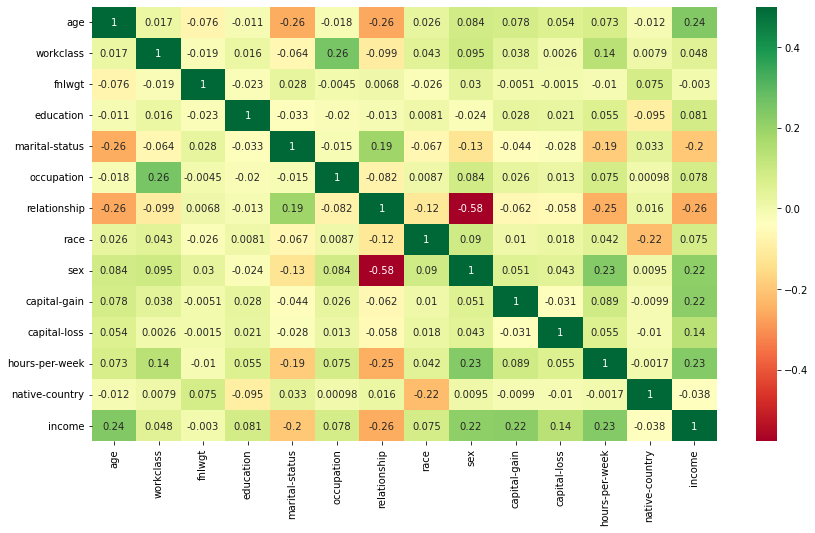

In [123]:
# Correlation Heatmap
plt.figure(figsize=[14,8])
sns.heatmap(temp_data.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

In [124]:
train_data_dummie.iloc[:,7:13]

,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov
no,,,,,,
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
5,0,0,1,0,0,0
...,...,...,...,...,...,...
29301,0,0,1,0,0,0
29302,0,0,1,0,0,0
29303,0,0,0,0,1,0


In [125]:
# Droping those features which we are not going to use
final_features = train_data_dummie.drop(['fnlwgt','workclass_ Local-gov', 'workclass_ Never-worked','workclass_ Private',
                                         'workclass_ Self-emp-inc','workclass_ Self-emp-not-inc', 'workclass_ State-gov',
                                         'workclass_ Without-pay'], axis=1)


In [126]:
X = final_features.drop(['income'],axis=1)
y = final_features['income']

In [127]:
# Feature scaling on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['age', 'capital-gain', 'capital-loss', 'hours-per-week']])

StandardScaler()

In [128]:
input_scaled = scaler.transform(X[['age', 'capital-gain', 'capital-loss', 'hours-per-week']])
scaled_data = pd.DataFrame(input_scaled,columns=['age', 'capital-gain', 'capital-loss', 'hours-per-week'])
X_scaled = scaled_data.join(X.drop(['age','capital-gain', 'capital-loss','hours-per-week'],axis=1))


In [ ]:
! pip install imbalanced-learn

In [129]:
# Fixing imbalanced dataset by oversampling
# 클래스 불균형 처리를 해주는 imbalanced-learn를 호출
from imblearn.over_sampling import RandomOverSampler


In [130]:
rd_over_sample = RandomOverSampler()
X_sampled, y_sampled = rd_over_sample.fit_resample(X_scaled,y)

C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pipi1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


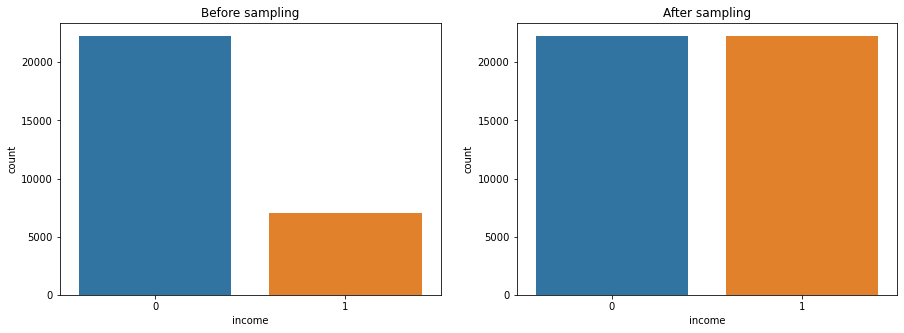

Before sampling : 
0    22260
1     7045
Name: income, dtype: int64

After sampling : 
0    22260
1    22260
Name: income, dtype: int64


In [131]:
# Plot Before sampling
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(train_data_dummie['income'])
plt.title("Before sampling")

# Plot After sampling
plt.subplot(1,2,2)
sns.countplot(y_sampled.squeeze())
plt.title("After sampling")
plt.show()

print('Before sampling : \n{}'.format(y.value_counts()))
print('\nAfter sampling : \n{}'.format(y_sampled.value_counts()))

In [132]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0)


In [133]:
# Model Building
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)

# Training Model
xgb.fit(x_train, y_train)

# Mode summary
y_pred_xgb = xgb.predict(x_test)
y_pred_train_xgb = xgb.predict(x_train)

In [134]:
# XGB Classifier Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

classifier=XGBClassifier()
random_search = RandomizedSearchCV(classifier,
                                 param_distributions=params,
                                 n_iter=5, n_jobs=-1,cv=5,verbose=3)


In [135]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

In [136]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [137]:

# Again Training our model with best parameter
xgb_tune = XGBClassifier(random_state=0,min_child_weight=3,max_depth= 15,
                    learning_rate = 0.1,gamma= 0.1,
                    colsample_bytree= 0.7)
xgb_tune.fit(x_train,y_train)
y_pred_xgb_tune = xgb_tune.predict(x_test)

In [138]:
print("-----Test Data Accuracy----")
print('Gradient Boosting Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb_tune), 3))

-----Test Data Accuracy----
Gradient Boosting Classifier:
Accuracy score: 0.794


In [139]:
test_pre=salary_model.predict(test)
test_pre

NameError: name 'salary_model' is not defined

In [140]:
submission = pd.read_csv("./data/salary/sample_submission.csv")
submission

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [ ]:
submission['income'] = test_pre
submission

In [ ]:
X_train, test, y_train

In [ ]:
# csv파일로 저장 index=False -> 이걸 안하면 인덱스도 컬럼으로 저장된다
submission.to_csv("./data/salary/myPrediction.csv", index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=118, # 랜덤 수 고정
                                 n_estimators=1000, # 앙상블할 모델의 갯수 
                                 max_features=0.6, # 학습에 사용할 특성 수
                                 max_depth=10) # 트리의 깊이 설정 


In [ ]:
X_train1,X_val,y_train1,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=118)                                                                                                                       
rf_model.fit(X_train,y_train)
pre= salary_model.predict(X_val)
pre
score = accuracy_score(y_val,pre)
print("정확도 : ",score)

In [ ]:
rf_pre = rf_model.predict(X_test)

In [ ]:
X_train.info()

In [ ]:
X_train

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
X_train1,X_val,y_train1,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=118)                                                                                                                       
xgb_model.fit(X_train1,y_train1)
pre= xgb_model.predict(X_val)
pre
score = accuracy_score(y_val,pre)
print("정확도 : ",score)

In [ ]:
pre_xgb = xgb_model.predict(X_test)

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
X_train1,X_val,y_train1,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=118)                                                                                                                       
svm_clf.fit(X_train1,y_train1)
pre= svm_clf.predict(X_val)
pre
score = accuracy_score(y_val,pre)
print("정확도 : ",score)




In [ ]:
test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=13, random_state=118)
X_train1,X_val,y_train1,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=118)                                                                                                                       
rf_clf.fit(X_train1,y_train1)
pre= rf_clf.predict(X_val)
pre
score = accuracy_score(y_val,pre)
print("정확도 : ",score)

In [ ]:
test_y_pred_rf = rf_clf.predict(test)

In [ ]:
submission = pd.read_csv("./data/salary/sample_submission.csv")
submission

In [ ]:
submission['income'] = test_y_pred_rf 
submission

In [ ]:

submission.to_csv("./data/salary/myPrediction7.csv", index=False)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(rf_model,X_train,y_train,cv=5)
cross_score.mean()

In [ ]:
from sklearn.model_selection import GridSearchCV
model2 = RandomForestClassifier(random_state=118)
# 파라미터 조합
pram_grid = {
    'max_depth' : [5, 7, 9, 10],
    'n_estimators' : [10,20,25,30],
    'max_features' : [0.5, 0.7, 0.8]
}  # 총 4x4x3 개
grid = GridSearchCV(model2,   #튜닝할 모델
                    pram_grid, # 튜닝해볼 파라미터 조합
                    cv=3, # 교차검증 횟수
                    n_jobs=-1)  # 연산에 사용할 pc코어 수(-1 = 모든 피씨의 연산을 여기에 집중시키겠다)
                    # 총 파라미터 조합갯수 x 교차검증횟수(cv)
                    

In [ ]:
grid.fit(X_train,y_train)
print("최고 점수",grid.best_score_)
print("최고 조합",grid.best_params_)

In [ ]:
# Model Building
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)

# Training Model
xgb.fit(x_train, y_train)

# Mode summary
y_pred_xgb = xgb.predict(x_test)
y_pred_train_xgb = xgb.predict(x_train)